#### The purpose of this file is just to generate images for the slideshow

In [32]:
import numpy as np
import matplotlib.pyplot  as plt
import pandas as pd

df=pd.read_csv('../data/highly_relevant_posts_descending_threshold_50_augmented.csv')
df_Lamotrigine = pd.read_csv('../data/Lamotrigine_sentiments_4o.csv')

In [33]:
df_Lamotrigine.head()

,title,selftext,created_utc,over_18,subreddit,date_created,combined_text,processed_text,relevance_probability,drug_list,reponse_Lamotrigine
0,"Informal survey: What (legal) drugs, if any, '...","hi! so i'm officially diagnosed, tried dbt but...",1602953594,False,BPD,2020-10-17 16:53:14,"Informal survey: What (legal) drugs, if any, '...",informal survey legal drug worked hi im offici...,1.000000,"['Alprazolam', 'Amitriptyline', 'Aripiprazole'...","```json\n{\n ""sentiment"": ""-"",\n ""reason"": ""..."
1,My experience with lamictal/lamotrigine,this is going to be a very long post because i...,1628777635,False,BPD,2021-08-12 14:13:55,My experience with lamictal/lamotrigine this i...,experience lamictallamotrigine going long post...,1.000000,"['Alprazolam', 'Bupropion', 'Buspirone', 'Clon...","```json\n{\n ""sentiment"": ""1"",\n ""reason"": ""..."
2,What medication(s) work best for when you have...,i am formally diagnosed with severe general an...,1618869415,False,BPD,2021-04-19 21:56:55,What medication(s) work best for when you have...,medication work best several mental illness in...,0.999999,"['Amphetamine', 'Aripiprazole', 'Bupropion', '...","```json\n{\n ""sentiment"": ""1"",\n ""reason"": ""..."
3,My first time Inpatient: how I learned to advo...,"hi everyone, i just got released from the hosp...",1594470067,False,BPD,2020-07-11 12:21:07,My first time Inpatient: how I learned to advo...,first time inpatient learned advocate hi every...,0.999997,"['Fluoxetine', 'Lamotrigine']","```json\n{\n ""sentiment"": ""-1"",\n ""reason"": ..."
4,Tomorrow I am seeing my doctor pertaining to m...,"okay, i just need to get this out. \n\nso afte...",1451986895,False,BPD,2016-01-05 09:41:35,Tomorrow I am seeing my doctor pertaining to m...,tomorrow seeing doctor pertaining medication i...,0.999996,"['Aripiprazole', 'Lamotrigine', 'Topiramate']","```json\n{\n ""sentiment"": ""-"",\n ""reason"": ""..."


Note the accidental mispelling 'reponse'

In [34]:
import json

# Function to extract sentiment and reason from the JSON-like string
def extract_sentiment_reason(json_str):
    # Remove the enclosing ```json ``` and any leading/trailing whitespace
    json_str = json_str.strip("```json ").strip()
    try:
        # Parse the JSON string
        parsed_json = json.loads(json_str)
        sentiment = parsed_json.get("sentiment", "")
        reason = parsed_json.get("reason", "")
        return pd.Series([sentiment, reason])
    except json.JSONDecodeError:
        # Return empty values if JSON parsing fails
        return pd.Series(["", ""])

# Apply the function to the 'response_Lamotrigine' column
df_Lamotrigine[['sentiment', 'reason']] = df_Lamotrigine['reponse_Lamotrigine'].apply(extract_sentiment_reason)


In [35]:
df_Lamotrigine.head()

,title,selftext,created_utc,over_18,subreddit,date_created,combined_text,processed_text,relevance_probability,drug_list,reponse_Lamotrigine,sentiment,reason
0,"Informal survey: What (legal) drugs, if any, '...","hi! so i'm officially diagnosed, tried dbt but...",1602953594,False,BPD,2020-10-17 16:53:14,"Informal survey: What (legal) drugs, if any, '...",informal survey legal drug worked hi im offici...,1.000000,"['Alprazolam', 'Amitriptyline', 'Aripiprazole'...","```json\n{\n ""sentiment"": ""-"",\n ""reason"": ""...",-,The poster did not mention any personal experi...
1,My experience with lamictal/lamotrigine,this is going to be a very long post because i...,1628777635,False,BPD,2021-08-12 14:13:55,My experience with lamictal/lamotrigine this i...,experience lamictallamotrigine going long post...,1.000000,"['Alprazolam', 'Bupropion', 'Buspirone', 'Clon...","```json\n{\n ""sentiment"": ""1"",\n ""reason"": ""...",1,The poster experienced a marked reduction in t...
2,What medication(s) work best for when you have...,i am formally diagnosed with severe general an...,1618869415,False,BPD,2021-04-19 21:56:55,What medication(s) work best for when you have...,medication work best several mental illness in...,0.999999,"['Amphetamine', 'Aripiprazole', 'Bupropion', '...","```json\n{\n ""sentiment"": ""1"",\n ""reason"": ""...",1,Lamotrigine initially worked well as a mood st...
3,My first time Inpatient: how I learned to advo...,"hi everyone, i just got released from the hosp...",1594470067,False,BPD,2020-07-11 12:21:07,My first time Inpatient: how I learned to advo...,first time inpatient learned advocate hi every...,0.999997,"['Fluoxetine', 'Lamotrigine']","```json\n{\n ""sentiment"": ""-1"",\n ""reason"": ...",-1,The poster felt that Lamotrigine was ineffecti...
4,Tomorrow I am seeing my doctor pertaining to m...,"okay, i just need to get this out. \n\nso afte...",1451986895,False,BPD,2016-01-05 09:41:35,Tomorrow I am seeing my doctor pertaining to m...,tomorrow seeing doctor pertaining medication i...,0.999996,"['Aripiprazole', 'Lamotrigine', 'Topiramate']","```json\n{\n ""sentiment"": ""-"",\n ""reason"": ""...",-,The poster has not taken the medication yet an...


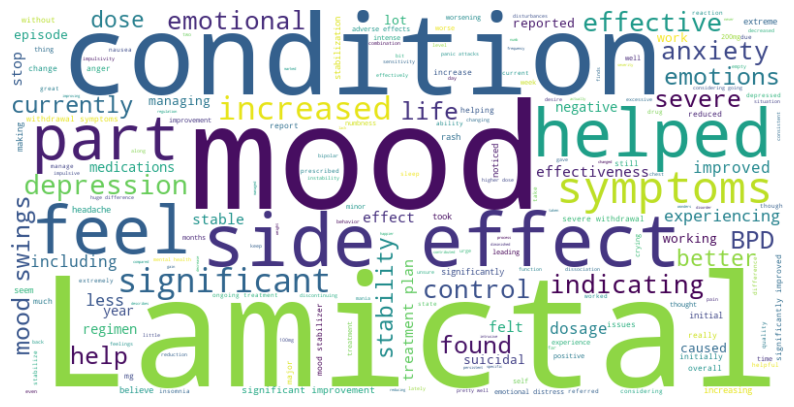

In [36]:
from wordcloud import WordCloud, STOPWORDS

df_taken = df_Lamotrigine[df_Lamotrigine['sentiment'] != '-']

# Combine the 'combined_text' of those rows
combined_text = " ".join(df_taken['reason'])

# Define additional stopwords if needed
stopwords = set(STOPWORDS)
additional_stopwords = {"medication", "Lamotrigine", "poster", "taking", "seeking","mention","experienced","although","mentioned","despite","starting","mentions","enough","information","provide","make","made","yet","feeling","conclusion"}  # Adding custom stopwords.
stopwords.update(additional_stopwords)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(combined_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
#plt.title(f"Word Cloud for {most_frequent_medication}", fontsize=20)
plt.show()

wordcloud.to_file('Lamotrigine_sentiments.png')

In [37]:
combined_text

"The poster experienced a marked reduction in the frequency and severity of their episodes with no significant side effects. Lamotrigine initially worked well as a mood stabilizer but stopped being effective after 3.5 months and caused brain fog. The poster felt that Lamotrigine was ineffective and compared it to eating candy, indicating it did not help their condition. The poster experienced a severe rash and was advised to stop taking the medication immediately. The poster experienced improved mood stability and reduced crying, with the only side effect being tiredness in the evening. Lamotrigine gave the poster intense chest pain. The poster has been taking Lamotrigine and their dose was increased, indicating it is part of their ongoing treatment plan. Lamotrigine worked wonders initially, significantly improving the poster's condition, although there were some issues with depression upon resuming the medication. The poster is satisfied with Lamotrigine as it helps with intrusive th

In [38]:
df_taken.info

<bound method DataFrame.info of                                                  title  \
1              My experience with lamictal/lamotrigine   
2    What medication(s) work best for when you have...   
3    My first time Inpatient: how I learned to advo...   
5                           I’m so sick of medication!   
7           Lamictal (Lamotrigine) + What Combination?   
..                                                 ...   
544          Finally coming to terms with my diagnosis   
546  First episodes in a couple months, had two in ...   
547                 Lamictal experiences/side effects?   
549                          Paranoia is getting worse   
551  Do you ever feel like your medication is actua...   

                                              selftext  created_utc  over_18  \
1    this is going to be a very long post because i...   1628777635    False   
2    i am formally diagnosed with severe general an...   1618869415    False   
3    hi everyone, i just got re

In [39]:
# Count the occurrences of each sentiment value
sentiment_counts = df_taken['sentiment'].value_counts()

In [40]:
sentiment_counts

sentiment
1     194
-1     87
0      10
        6
Name: count, dtype: int64

There are some missing values here. What is going on?

In [41]:
df_check = df_taken[df_taken['sentiment']=='']

In [42]:
df_check.head(6)

,title,selftext,created_utc,over_18,subreddit,date_created,combined_text,processed_text,relevance_probability,drug_list,reponse_Lamotrigine,sentiment,reason
44,Mood stabilizer help,so i need help on finding a good mood stabiliz...,1625517628,False,BPD,2021-07-05 20:40:28,Mood stabilizer help so i need help on finding...,mood stabilizer help need help finding good mo...,0.998725,"['Carbamazepine', 'Lamotrigine', 'Oxcarbazepin...","{\n 'sentiment': '1',\n 'reason': 'The poste...",,
141,Lamictal side effects? Ideas for dealing with ...,so my doc put me on 25mg lamictal / lamotrigin...,1605395139,False,BPD,2020-11-14 23:05:39,Lamictal side effects? Ideas for dealing with ...,lamictal side effect idea dealing negative sid...,0.976902,"['Diazepam', 'Lamotrigine']","{\n 'sentiment': '-1',\n 'reason': 'The post...",,
168,Lamictal (Lamotrigine) and PMS,i’m currently on lamotrigine and sitting at 75...,1559678231,False,BPD,2019-06-04 19:57:11,Lamictal (Lamotrigine) and PMS i’m currently o...,lamictal lamotrigine pm i’m currently lamotrig...,0.948826,['Lamotrigine'],"{\n 'sentiment': '-',\n 'reason': 'The poste...",,
192,Lamictal making it easier to be neutral,have you guys had any experience with lamictal...,1514566779,False,BPD,2017-12-29 16:59:39,Lamictal making it easier to be neutral have y...,lamictal making easier neutral guy experience ...,0.943418,['Lamotrigine'],"{\n 'sentiment': '1',\n 'reason': 'The poste...",,
445,DAE have psychotic episodes?,idk if it can actually be considered “psychosi...,1613841451,False,BPD,2021-02-20 17:17:31,DAE have psychotic episodes? idk if it can act...,dae psychotic episode idk actually considered ...,0.698454,"['Lamotrigine', 'Sertraline']","{\n 'sentiment': '-',\n 'reason': 'The poste...",,
547,Lamictal experiences/side effects?,"i've been on lamictal for a little bit now, an...",1590294261,False,BPD,2020-05-24 04:24:21,Lamictal experiences/side effects? i've been o...,lamictal experiencesside effect ive lamictal l...,0.505578,['Lamotrigine'],"{\n 'sentiment': '-',\n 'reason': 'The poste...",,


We can see here that the json parsing failed. Let's fix these.

In [43]:
df_check = df_Lamotrigine[df_Lamotrigine['sentiment']=='']

In [44]:
df_check.head(10)

,title,selftext,created_utc,over_18,subreddit,date_created,combined_text,processed_text,relevance_probability,drug_list,reponse_Lamotrigine,sentiment,reason
44,Mood stabilizer help,so i need help on finding a good mood stabiliz...,1625517628,False,BPD,2021-07-05 20:40:28,Mood stabilizer help so i need help on finding...,mood stabilizer help need help finding good mo...,0.998725,"['Carbamazepine', 'Lamotrigine', 'Oxcarbazepin...","{\n 'sentiment': '1',\n 'reason': 'The poste...",,
141,Lamictal side effects? Ideas for dealing with ...,so my doc put me on 25mg lamictal / lamotrigin...,1605395139,False,BPD,2020-11-14 23:05:39,Lamictal side effects? Ideas for dealing with ...,lamictal side effect idea dealing negative sid...,0.976902,"['Diazepam', 'Lamotrigine']","{\n 'sentiment': '-1',\n 'reason': 'The post...",,
168,Lamictal (Lamotrigine) and PMS,i’m currently on lamotrigine and sitting at 75...,1559678231,False,BPD,2019-06-04 19:57:11,Lamictal (Lamotrigine) and PMS i’m currently o...,lamictal lamotrigine pm i’m currently lamotrig...,0.948826,['Lamotrigine'],"{\n 'sentiment': '-',\n 'reason': 'The poste...",,
192,Lamictal making it easier to be neutral,have you guys had any experience with lamictal...,1514566779,False,BPD,2017-12-29 16:59:39,Lamictal making it easier to be neutral have y...,lamictal making easier neutral guy experience ...,0.943418,['Lamotrigine'],"{\n 'sentiment': '1',\n 'reason': 'The poste...",,
445,DAE have psychotic episodes?,idk if it can actually be considered “psychosi...,1613841451,False,BPD,2021-02-20 17:17:31,DAE have psychotic episodes? idk if it can act...,dae psychotic episode idk actually considered ...,0.698454,"['Lamotrigine', 'Sertraline']","{\n 'sentiment': '-',\n 'reason': 'The poste...",,
547,Lamictal experiences/side effects?,"i've been on lamictal for a little bit now, an...",1590294261,False,BPD,2020-05-24 04:24:21,Lamictal experiences/side effects? i've been o...,lamictal experiencesside effect ive lamictal l...,0.505578,['Lamotrigine'],"{\n 'sentiment': '-',\n 'reason': 'The poste...",,


In [45]:
df_Lamotrigine.sentiment[44] = '1'
df_Lamotrigine.sentiment[141] = '-1'
df_Lamotrigine.sentiment[168] = '0' #Overwriting these after reading the posts
df_Lamotrigine.sentiment[192] = '1'
df_Lamotrigine.sentiment[445] = '0' #Overwriting these after reading the posts
df_Lamotrigine.sentiment[547] = '-'

/var/folders/9j/j4gyltgs6txd83bg66_mv4fn664jzt/T/ipykernel_36443/1965990994.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_Lamotrigine.sentiment[44] = '1'
/var/folders/9j/j4gyltgs6txd83bg66_mv4fn664jzt/T/ipykernel_36443/1965990994.py

In [46]:
df_Lamotrigine.reason[44] = 'The poster liked Lamotrigine a lot, but it caused their face and scalp to burn badly.'
df_Lamotrigine.reason[141] = 'The poster experienced worsened depression, anxiety, and extreme fatigue after taking Lamotrigine for two days.'
df_Lamotrigine.reason[168] = 'The poster is currently adjusting their dosage of Lamotrigine and experiencing mood changes, but it is unclear if these changes are due to the medication or PMS.'
df_Lamotrigine.reason[192] = 'The poster experienced periods of feeling neutral, indicating some positive effect from the medication.'
df_Lamotrigine.reason[445] = 'The poster just started taking Lamotrigine and has not yet reported any effects or experiences.'
df_Lamotrigine.reason[547] = 'The poster describes experiencing headaches, nausea, blurry vision, and decreased appetite after increasing the dose of Lamotrigine, but has not concluded whether the medication is effective or worth continuing.'

/var/folders/9j/j4gyltgs6txd83bg66_mv4fn664jzt/T/ipykernel_36443/1874816919.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_Lamotrigine.reason[44] = 'The poster liked Lamotrigine a lot, but it caused their face and scalp to burn badly

Looking at some of these, the '0' and '-' are not being distinguished well.

In [47]:
df_dash = df_Lamotrigine[df_Lamotrigine.sentiment == '-']

In [48]:
df_dash.head(10)

,title,selftext,created_utc,over_18,subreddit,date_created,combined_text,processed_text,relevance_probability,drug_list,reponse_Lamotrigine,sentiment,reason
0,"Informal survey: What (legal) drugs, if any, '...","hi! so i'm officially diagnosed, tried dbt but...",1602953594,False,BPD,2020-10-17 16:53:14,"Informal survey: What (legal) drugs, if any, '...",informal survey legal drug worked hi im offici...,1.000000,"['Alprazolam', 'Amitriptyline', 'Aripiprazole'...","```json\n{\n ""sentiment"": ""-"",\n ""reason"": ""...",-,The poster did not mention any personal experi...
4,Tomorrow I am seeing my doctor pertaining to m...,"okay, i just need to get this out. \n\nso afte...",1451986895,False,BPD,2016-01-05 09:41:35,Tomorrow I am seeing my doctor pertaining to m...,tomorrow seeing doctor pertaining medication i...,0.999996,"['Aripiprazole', 'Lamotrigine', 'Topiramate']","```json\n{\n ""sentiment"": ""-"",\n ""reason"": ""...",-,The poster has not taken the medication yet an...
6,Effexor and Trazodone?,"i was diagnosed with bpd about two years ago, ...",1504706910,False,BPD,2017-09-06 14:08:30,Effexor and Trazodone? i was diagnosed with bp...,effexor trazodone diagnosed bpd two year ago i...,0.999996,"['Amphetamine', 'Bupropion', 'Fluoxetine', 'La...","```json\n{\n ""sentiment"": ""-"",\n ""reason"": ""...",-,The poster did not mention taking Lamotrigine ...
15,Can meds help with dissociation and derealisat...,"i've got a question for y'all, is there any me...",1629543687,False,BPD,2021-08-21 11:01:27,Can meds help with dissociation and derealisat...,med help dissociation derealisation ive got qu...,0.999932,"['Lamotrigine', 'Quetiapine', 'Venlafaxine']","```json\n{\n ""sentiment"": ""-"",\n ""reason"": ""...",-,The poster has not yet reached the full dose o...
19,med advice/experience,hello! i am looking to see if anyone has had s...,1527806810,False,BPD,2018-05-31 22:46:50,med advice/experience hello! i am looking to s...,med adviceexperience hello looking see anyone ...,0.999843,"['Lamotrigine', 'Quetiapine', 'Trazodone']","```json\n{\n ""sentiment"": ""-"",\n ""reason"": ""...",-,The poster is in the process of transitioning ...
20,Mood stabilizer for BPD,"hello, my girlfriend has bpd and cyclothymia a...",1514834572,False,BPD,2018-01-01 19:22:52,"Mood stabilizer for BPD hello, my girlfriend h...",mood stabilizer bpd hello girlfriend bpd cyclo...,0.999807,"['Lamotrigine', 'Oxcarbazepine']","```json\n{\n ""sentiment"": ""-"",\n ""reason"": ""...",-,The poster is asking questions about oxcarbaze...
21,New meds.,hi there. so i've been on effexor and seroquel...,1609973960,False,BPD,2021-01-06 22:59:20,New meds. hi there. so i've been on effexor an...,new med hi ive effexor seroquel year theyve gr...,0.999804,"['Aripiprazole', 'Brexpiprazole', 'Carbamazepi...","```json\n{\n ""sentiment"": ""-"",\n ""reason"": ""...",-,The poster has not taken Lamotrigine.
22,"So, I’m struggling again. Here’s me story. *TR...","so i have bpd (obviously), with severe clinica...",1582079701,False,BPD,2020-02-19 02:35:01,"So, I’m struggling again. Here’s me story. *TR...",i’m struggling here’s story triggering bpd obv...,0.999781,"['Diazepam', 'Fluoxetine', 'Lamotrigine', 'Ven...","```json\n{\n ""sentiment"": ""-"",\n ""reason"": ""...",-,The poster mentioned being put on Lamotrigine ...
23,All of this shit is too much,"the outages, the loss of water, the pandemic, ...",1613692321,False,BPD,2021-02-18 23:52:01,"All of this shit is too much the outages, the ...",shit much outage loss water pandemic isolation...,0.999772,"['Alprazolam', 'Amitriptyline', 'Aripiprazole'...","```json\n{\n ""sentiment"": ""-"",\n ""reason"": ""...",-,There is not enough information to make a conc...
24,Please someone tell me it gets better...,i was diagnosed with bpd back in 2016 but didn...,1610240496,False,BPD,2021-01-10 01:01:36,Please someone tell me it gets better... i was...,please someone tell get better diagnosed bpd b...,0.999772,"['Lamotrigine', 'Lurasidone', 'Parox

In [49]:
df_Lamotrigine.to_csv('../data/Lamotrigine_sentiments_4o_cleaned.csv', index=False)

I've manually coded the data to be more accurate. Let's get back to making images

In [50]:
df_Lamotrigine = pd.read_csv('../data/Lamotrigine_sentiments_4o_cleaned_and_coded.csv')

In [51]:
df_taken = df_Lamotrigine[df_Lamotrigine['sentiment'] != '-']

In [52]:
sentiment_counts = df_Lamotrigine['sentiment'].value_counts()

In [53]:
sentiment_counts

sentiment
1     194
-     159
-1    106
0      93
Name: count, dtype: int64

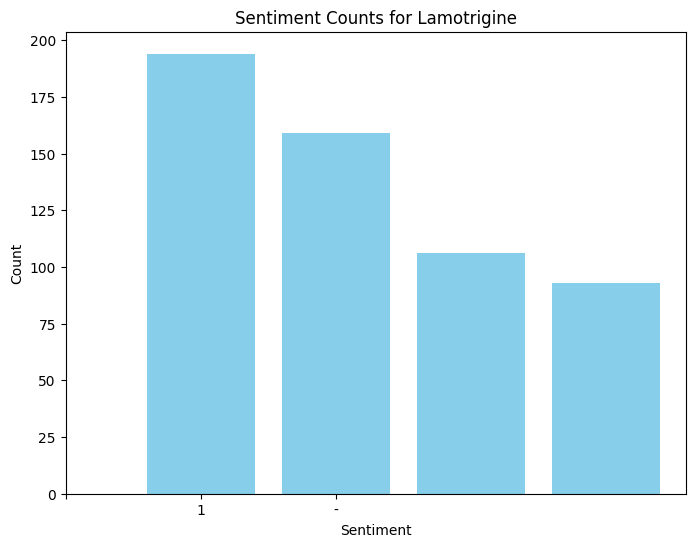

In [54]:
# Plot the histogram
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color='skyblue')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Counts for Lamotrigine')
plt.xticks([1, 0, -1])
plt.show()

In [55]:
pip install squarify

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [56]:
import matplotlib.pyplot as plt
import squarify
import numpy as np

In [57]:
df_Lamotrigine.sentiment[5]

'-1'

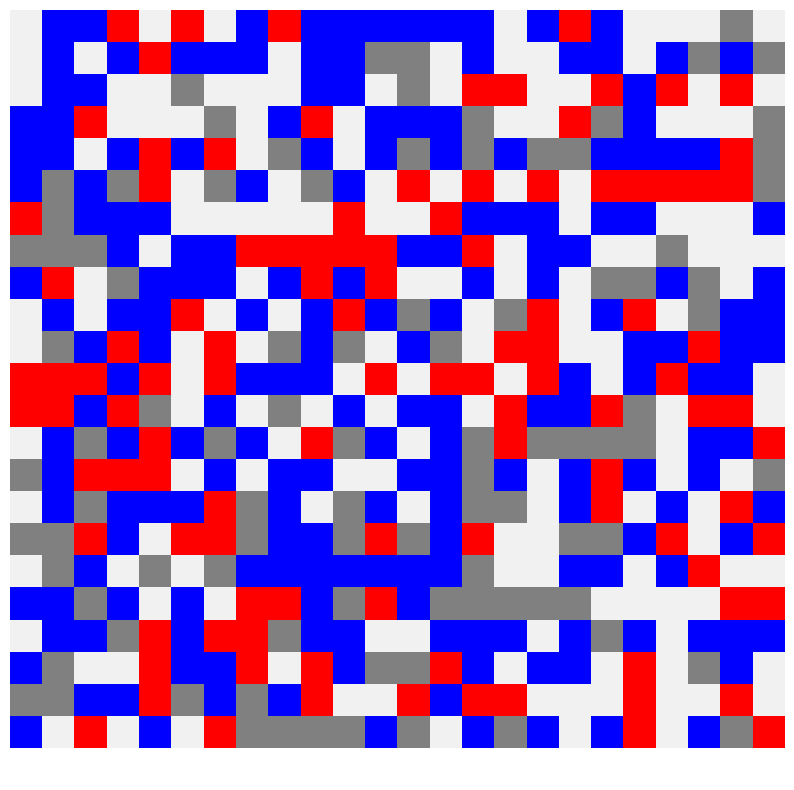

In [58]:
from matplotlib.colors import to_rgba


# Function to convert sentiment to RGBA color
def sentiment_to_rgba(sentiment):
    if sentiment == '1':
        return to_rgba('blue')
    elif sentiment == '-1':
        return to_rgba('red')
    elif sentiment == '0':
        return to_rgba('gray')
    elif sentiment == '-':
        return to_rgba('lightgray', alpha=0.3)
    return to_rgba('white')

# Extract the colors based on the sentiment values
colors = np.array([sentiment_to_rgba(sentiment) for sentiment in df_Lamotrigine['sentiment']])

# Number of squares (posts)
num_posts = len(df_Lamotrigine)

# Determine grid size for the plot
grid_size = int(np.ceil(np.sqrt(num_posts)))

# Create a grid of colors
color_grid = np.full((grid_size * grid_size, 4), to_rgba('white'), dtype=float)  # 4 for RGBA
color_grid[:num_posts] = colors

# Reshape to 2D grid for plotting
color_grid = color_grid.reshape((grid_size, grid_size, 4))

# Plot the grid of colors
plt.figure(figsize=(10, 10))
plt.imshow(color_grid, aspect='auto')
plt.axis('off')
#plt.title('Sentiments of Lamotrigine Posts')
plt.savefig('sentiment_representation.png', bbox_inches='tight', pad_inches=0.1)
plt.show()




In [59]:
# Define the order for sorting sentiments
sentiment_order = {'1': 0, '0': 1, '-1': 2, '-': 3}

# Add a column to sort by sentiment
df_Lamotrigine['sentiment_order'] = df_Lamotrigine['sentiment'].map(sentiment_order)

# Sort the DataFrame by sentiment order
sorted_df = df_Lamotrigine.sort_values(by='sentiment_order').drop(columns='sentiment_order').reset_index(drop=True)


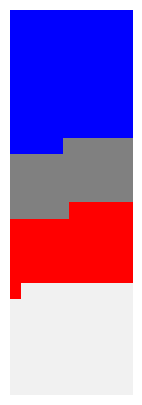

In [60]:
# Extract the colors based on the sentiment values
colors = np.array([sentiment_to_rgba(sentiment) for sentiment in sorted_df['sentiment']])

# Number of squares (posts)
num_posts = len(sorted_df)

# Determine grid size for the plot
grid_height = int(np.ceil(np.sqrt(num_posts)))
grid_width = int(np.ceil(num_posts / grid_height))

# Create a grid of colors
color_grid = np.full((grid_height * grid_width, 4), to_rgba('white'), dtype=float)  # 4 for RGBA
color_grid[:num_posts] = colors

# Reshape to 2D grid for plotting
color_grid = color_grid.reshape((grid_height, grid_width, 4))

# Plot the grid of colors
plt.figure(figsize=(15, 5))  # Width: 15 inches, Height: 5 inches
plt.imshow(color_grid, aspect=3/1)  # Set aspect ratio to 3:1
plt.axis('off')
#plt.title('Sentiment Representation for Lamotrigine Posts')
plt.savefig('sentiment_representation_ordered.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

In [61]:
from matplotlib.colors import to_rgba


# Function to convert sentiment to RGBA color
def sentiment_to_rgba2(sentiment_merged):
    if sentiment == '1':
        return to_rgba('blue')
    elif sentiment == '-1':
        return to_rgba('red')
    elif sentiment == '0':
        return to_rgba('gray',alpha=0.3)
    elif sentiment == '-':
        return to_rgba('lightgray', alpha=0.3)
    return to_rgba('white')

# Extract the colors based on the sentiment values
colors = np.array([sentiment_to_rgba2(sentiment) for sentiment in df_Lamotrigine['sentiment']])

# Number of squares (posts)
num_posts = len(df_Lamotrigine)

# Determine grid size for the plot
grid_size = int(np.ceil(np.sqrt(num_posts)))

# Create a grid of colors
color_grid = np.full((grid_size * grid_size, 4), to_rgba('white'), dtype=float)  # 4 for RGBA
color_grid[:num_posts] = colors

# Reshape to 2D grid for plotting
color_grid = color_grid.reshape((grid_size, grid_size, 4))

# Plot the grid of colors
plt.figure(figsize=(10, 10))
plt.imshow(color_grid, aspect='auto')
plt.axis('off')
#plt.title('Sentiments of Lamotrigine Posts')
plt.savefig('sentiment_representation.png', bbox_inches='tight', pad_inches=0.1)
plt.show()




NameError: name 'sentiment' is not defined

In [ ]:
# Define the order for sorting sentiments
sentiment_order_merged = {'1': 0, '0': 1, '-': 2, '-1': 3}

# Add a column to sort by sentiment
df_Lamotrigine['sentiment_order_merged'] = df_Lamotrigine['sentiment'].map(sentiment_order_merged)

# Sort the DataFrame by sentiment order
sorted_df_2 = df_Lamotrigine.sort_values(by='sentiment_order_merged').drop(columns='sentiment_order_merged').reset_index(drop=True)
